In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from functools import reduce

from numpy import kron, eye
from numpy.linalg import eigh

In [2]:
# define Paulis 
X = np.array([[0, 1], [1, 0]], dtype=complex)
Y = 1j*np.array([[0, -1], [1, 0]], dtype=complex)
Z = np.array([[1, 0], [0, -1]], dtype=complex)

S = {'I': eye(2, dtype=complex), 'X': X, 'Y': Y, 'Z': Z}

## Calculate expectations using ED

In [3]:
L = 5
BC = 'open' 

In [4]:
def generateHamiltonian(J, g, L, BC):
    if BC == 'open':
        return generateHamiltonianOpen(J, g, L)
    else: 
        return generateHamiltonianPeriodic(J, g, L)

In [5]:
def generateHamiltonianOpen(J, g, n):
    '''
    Generate n qubit TFIM Hamiltonian.
    '''

    h = np.zeros((2**n, 2**n)) + 0j

    for i in range(n-1):
        pString = ['I'] * n
        pString[i] = 'Z'
        pString[i+1] = 'Z'
        hzz = reduce(kron, [S[j] for j in pString])

        pString = ['I'] * n
        pString[i] = 'X'
        hxx = reduce(kron, [S[j] for j in pString])

        h += -J * hzz - g * hxx
    pString = ['I'] * n
    pString[n-1] = 'X'
    hxx += reduce(kron, [S[j] for j in pString])
    h -= g*hxx
    return h

def generateHamiltonianPeriodic(J, g, n):
    '''
    Generate n qubit TFIM Hamiltonian.
    '''

    h = np.zeros((2**n, 2**n)) + 0j

    for i in range(n-1):
        pString = ['I'] * n
        pString[i] = 'Z'
        pString[i+1] = 'Z'
        hzz = reduce(kron, [S[j] for j in pString])

        pString = ['I'] * n
        pString[i] = 'X'
        hxx = reduce(kron, [S[j] for j in pString])

        h += -J * hzz - g * hxx

    pString = ['I'] * n
    pString[n-1] = 'Z'
    pString[0] = 'Z'
    hzz = reduce(kron, [S[j] for j in pString])
    
    pString = ['I'] * n
    pString[n-1] = 'X'
    hxx += reduce(kron, [S[j] for j in pString])
    h += -J * hzz - g*hxx
    return h

In [6]:
J = 1
g = 0.5
L = 4 
kbT = 0.2
beta = 1/kbT

h = generateHamiltonianOpen(J, g, L)
evals, evecs = eigh(h)

partFuncZ = np.sum(np.exp(-beta*evals))

In [7]:
partFuncZ

131967552.76635696

- Checked that evecs are normalised (they are)

In [8]:
thermalExpH = 0.0
for i, eval in enumerate(evals):
    thermalExpH += np.exp(-beta*eval)*eval
thermalExpH /= partFuncZ

In [9]:
thermalExpH/L

-0.904297370637035

In [10]:
thermalExpH = np.sum(np.exp(-beta*evals)*evals) / partFuncZ

In [11]:
thermalExpH/L

-0.9042973706370352

In [12]:
kbTs = np.linspace(1e-5, 1.0, 20)
betas = 1/kbTs
expHOpen = np.zeros(len(kbTs))
expHPBC = np.zeros(len(kbTs))
J = 1
g = 0.5
L = 10 

hOpen = generateHamiltonianOpen(J, g, L)
evalsOpen, evecsOpen = eigh(hOpen)

hPBC = generateHamiltonianPeriodic(J, g, L)
evalsPBC, evecsPBC = eigh(hPBC)
for i, beta in enumerate(betas):
    partFuncZOpen = np.sum(np.exp(-beta*evalsOpen))
    expHOpen[i] = np.sum(np.exp(-beta*evalsOpen)*evalsOpen) / (L*partFuncZOpen)
    partFuncZPBC = np.sum(np.exp(-beta*evalsPBC))
    expHPBC[i] = np.sum(np.exp(-beta*evalsPBC)*evalsPBC) / (L*partFuncZPBC)

/tmp/ipykernel_4265/3640690986.py:15: RuntimeWarning: overflow encountered in exp
  partFuncZOpen = np.sum(np.exp(-beta*evalsOpen))
/tmp/ipykernel_4265/3640690986.py:16: RuntimeWarning: overflow encountered in exp
  expHOpen[i] = np.sum(np.exp(-beta*evalsOpen)*evalsOpen) / (L*partFuncZOpen)
/tmp/ipykernel_4265/3640690986.py:16: RuntimeWarning: invalid value encountered in scalar divide
  expHOpen[i] = np.sum(np.exp(-beta*evalsOpen)*evalsOpen) / (L*partFuncZOpen)
/tmp/ipykernel_4265/3640690986.py:17: RuntimeWarning: overflow encountered in exp
  partFuncZPBC = np.sum(np.exp(-beta*evalsPBC))
/tmp/ipykernel_4265/3640690986.py:18: RuntimeWarning: overflow encountered in exp
  expHPBC[i] = np.sum(np.exp(-beta*evalsPBC)*evalsPBC) / (L*partFuncZPBC)
/tmp/ipykernel_4265/3640690986.py:18: RuntimeWarning: invalid value encountered in scalar divide
  expHPBC[i] = np.sum(np.exp(-beta*evalsPBC)*evalsPBC) / (L*partFuncZPBC)


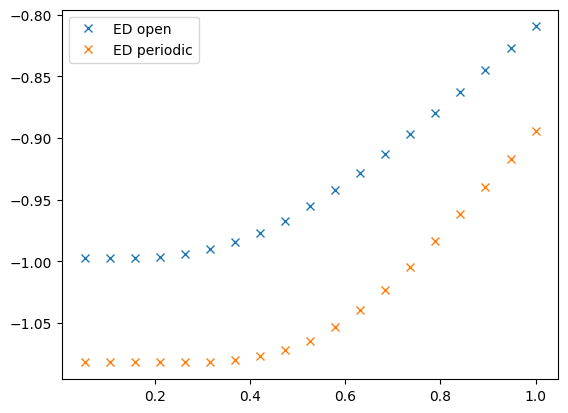

In [13]:
plt.plot(kbTs, expHOpen, 'x', label='ED open')
plt.plot(kbTs, expHPBC, 'x', label='ED periodic')
plt.legend()
plt.show()